# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [3]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [4]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
X = boston.data
y = boston.target

# 3. Train test split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# 4. Simple Linear Model

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train,y_train)
model

LinearRegression()

In [9]:
model.score(X_train,y_train)

0.7483910762223648

In [10]:
model.score(X_test,y_test)

0.7102042939876022

# 5. Ridge Regularization for Linear Model

In [11]:
from sklearn.linear_model import Ridge

In [12]:
modelr = Ridge(alpha=100)
modelr.fit(X_train,y_train)
modelr.score(X_train,y_train)

0.7143703532572215

In [13]:
modelr.score(X_test,y_test)

0.7010057947547861

# 6. Lasso Regularization for Linear Model

In [14]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha=0.1)
modelL.fit(X_train,y_train)
modelL.score(X_train,y_train)

0.7331069140566289

In [15]:
modelL.score(X_test,y_test)

0.7067566757722359

# 7. Polynomial Regression of degree 2

In [16]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [17]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
model.score(X_train_poly, y_train)

0.9450462225498184

In [18]:
model.score(X_test_poly, y_test)

0.7754656083947671

# 8. Ridge Regularization for Polynomial model

In [19]:
modelrp = Ridge(alpha=100000000)
modelrp.fit(X_train_poly,y_train)
modelrp.score(X_train_poly,y_train)

0.6933691461157744

In [20]:
modelrp.score(X_test_poly,y_test)

0.680472458874565

# 9. Lasso Regularization for Polynomial model

In [21]:
modelrpl = Lasso(alpha=10)
modelrpl.fit(X_train_poly,y_train)
modelrpl.score(X_train_poly,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+03, tolerance: 2.942e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.867897505851822

In [22]:
modelrpl.score(X_test_poly,y_test)

0.7965306415925347

# 10. Select K Best

In [23]:
kb = SelectKBest(score_func=f_regression, k=7)
x_selected = kb.fit_transform(X_train, y_train)
x_selected.shape

(354, 7)

In [24]:
lrk = LinearRegression()
lrk.fit(x_selected,y_train)
lrk.score(x_selected,y_train)

0.6892560904302554

In [25]:
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
model.score(X_train_poly, y_train)

0.9450462225498184

In [27]:
traindf = pd.DataFrame(data=X_train, columns=boston.feature_names)
tdf = pd.DataFrame(data=X_test, columns=boston.feature_names)
traindf['target']= y_train

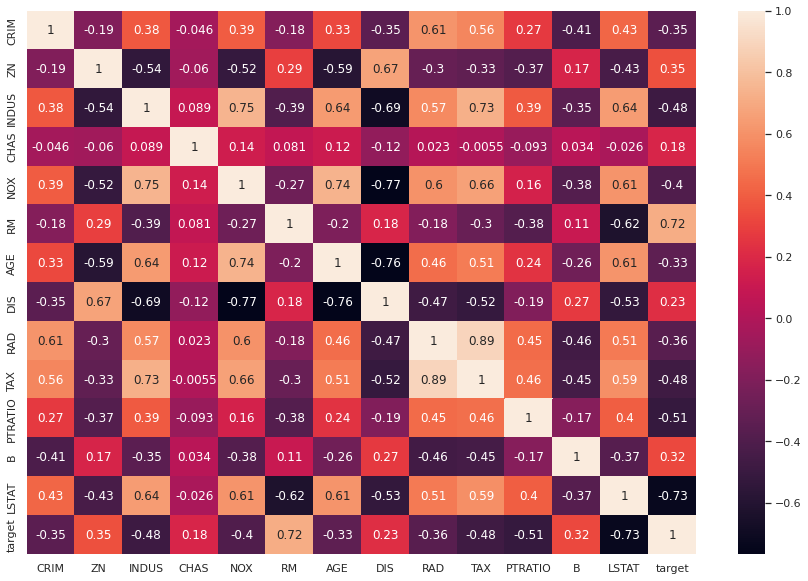

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
corr = traindf.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()


In [29]:
select_columns = ['CRIM','INDUS','NOX','RM','TAX','PTRATIO','LSTAT']
train_select = traindf[select_columns]
test_select = tdf[select_columns]
test_select.head()


CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0   0.54050   3.97  0.575  7.470  264.0     13.0   3.16
1  11.08740  18.10  0.718  6.411  666.0     20.2  15.02
2   0.15038  25.65  0.581  5.856  188.0     19.1  25.41
3   0.07875   3.44  0.437  6.782  398.0     15.2   6.68
4   9.23230  18.10  0.631  6.216  666.0     20.2   9.53

In [30]:
kmodel = LinearRegression()
kmodel.fit(train_select, y_train)
kmodel.score(train_select,y_train)

0.6816695009018376

In [31]:
kmodel.score(test_select,y_test)

0.6731198446754034

# 11. Conclusion

When using linear regression, there is a concern of overfitting. As a result, regularization was applied to eliminate the overfitting. For regularization, we had used ridge as well as lasso technique. To enhance the accuracy, we used a polynormal feature with a degree of 2. Any remaining overfitting was removed with the ridge and lasso. Because the accuracy didn't change much, we implemented selectkbest to get a high accuracy.
